Simple CNN for image classification on MNIST image dataset.

Installing a library to make handling the MNIST datafiles easier and importing all the libraries we will need.

In [ ]:
!pip install python-mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST


Accessing Google Drive where datafiles are stored and changing directory to where datafiles are placed inside Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
cd /content/MyDrive/MyDrive/Colab\ Notebooks

/content/MyDrive/MyDrive/Colab Notebooks


Use the the mnist library to open the original gz files and specify in the MNIST() function arguments where those files will be.

In [ ]:
mndata = MNIST('MNIST')
mndata.gz = True 

In [ ]:
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

The mnist library provides a quick way to roughly check what the image will look like. The MNIST images are displayed as 28x28x1 (grey-scale) matrices. We will later specify this for our CNN.

In [ ]:
print(mndata.display(test_images[7]))


............................
............................
............................
............................
............................
............................
............................
...........@@@..............
..........@@@@..............
..........@@@@@@............
.........@@@.@@@@...........
.........@....@@@@..........
.........@.....@@...........
.........@....@@@...........
.........@@...@@@@..........
.........@@@@@..@@..........
..........@@@....@@.........
..................@.........
..................@@........
...................@........
...................@@.......
....................@.......
....................@@......
.....................@......
......................@.....
......................@.....
............................
............................


We will have to reshape our data for the CNN so we need parameters like the number of images in each dataset and the length of each image, since it is currently a 1D array.

In [ ]:
im_length = len(train_images[0])
train_size = len(train_images)
test_size = len(test_images)

In [ ]:
print(im_length)
print(train_size)
print(test_size)

784
60000
10000


The code snippet below norms all the values from between 0-255 to 0-1 (float). We do this for both train and test.

In [ ]:
train_images_norm = np.ones(shape=(train_size, im_length))
for i in range(len(train_images)):
  for k in range(im_length):
    train_images_norm[i][k] = train_images[i][k]/255.0

In [ ]:
test_images_norm = np.ones(shape=(test_size, im_length))
for i in range(len(test_images)):
  for k in range(im_length):
    test_images_norm[i][k] = test_images[i][k]/255.0

We then reshape the images for the CNN. We create a matrix of zeros with dimensions for 60,000 images, each 28x28 with 1 channel. Hence our matrix is 60,000 by 28 by 28 by 1. The CNN needs for the channel dimension to be specified.

In [ ]:
train_images_re = np.zeros((60000,28,28,1))
for i in range(len(train_images)):
  train_images_re[i] = np.reshape(train_images_norm[i], (28,28,1))

In [ ]:
test_images_re = np.zeros((10000,28,28,1))
for i in range(len(test_images)):
  test_images_re[i] = np.reshape(test_images_norm[i], (28,28,1))

We will also convert the labels into numpy arrays

In [ ]:
train_labels_np = np.array(train_labels)
test_labels_np = np.array(test_labels)

We will use keras' Sequential() function to specify each layer of our network.The CNN takes in our images with the shape (height, weidth, channels) so we specify that in the input shape. We will use a very commmon pattern here of 2D convolution layers into sampling layers.

After the Sequential() function is called we will call the following layers.

1) Convolution layer with 32 filters sized 3x3 and activation function ReLU.

2) Max pooling with a 2x2 filter and a stride of 1 (not specified).

3) Convolution layer with 64 filter sized 3x3 and activation function ReLU.

4) Max pooling with a 2x2 filter and a stride of 1.

5) Convolution layer with 64 filters size 3x3 and activation function ReLU.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


Our images have now been transformed into a tensor of shape (3,3,64) and we will feed these into a dense layer for classification. We first have to flatten our images into 1D arrays, and in the Dense() function we specify the dimensionality of the output space as well as the activation funciton we'd like to use. The second dense layer will take as argument the number of classes.

In [ ]:

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Below we can check what our CNN architecture will look like.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

We compile the entire model calculating the loss function using Sparse Categorical Cross Entropy, since this is designed for classifications of two or more labels that are one-hot encoded. 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images_re, train_labels_np, epochs=10, batch_size = 100, 
                    validation_data=(test_images_re, test_labels_np))

Epoch 1/10
600/600 [==============================] - 5s 5ms/step - loss: 0.2098 - accuracy: 0.9367 - val_loss: 0.0509 - val_accuracy: 0.9828
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.0430 - val_accuracy: 0.9855
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0313 - val_accuracy: 0.9887
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0290 - val_accuracy: 0.9903
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0401 - val_accuracy: 0.9879
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0351 - val_accuracy: 0.9899
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0296 - val_accuracy: 0.9899
Epoch 

313/313 - 2s - loss: 0.0286 - accuracy: 0.9917 - 2s/epoch - 5ms/step


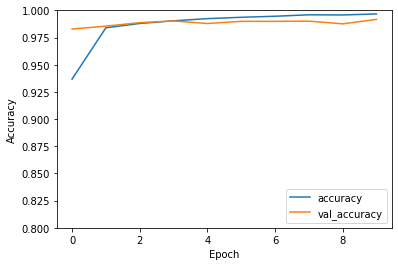

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_re,  test_labels_np, verbose=2)

In [ ]:
print(test_acc)

0.9916999936103821


In [ ]:
print(test_loss)

0.028637152165174484
